In [1]:
import pandas as pd
import re
import nltk

nltk.download('punkt')
nltk.download('stopwords')
Stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gowreeshgunupati/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gowreeshgunupati/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
def preprocess(sentence:str , train:bool):
    
    sent_lower = sentence.lower()
    
    sent_remove = re.sub(r'<newline>', '', sent_lower)
    
    sent_urls_remove = re.sub(r'http/S+','',sent_remove)
    
    sent_processed = re.sub(r'[^a-z]', ' ', sent_urls_remove)
    
    sent_tokenized = nltk.word_tokenize(sent_processed)
    
    sent_tokens_single = [word for word in sent_tokenized if len(word)==1]
    
    sent_word_tokens = [word for word in sent_tokenized if word not in Stop_words]
    
    sent_word_tokens = [word for word in sent_word_tokens if word not in sent_tokens_single]
    
    #sentence = ' '.join(sent_words)
    
    return sent_word_tokens

Reading the csv files we have created 

In [17]:
Train = pd.read_csv('writingPrompts/train_df.csv')
Test = pd.read_csv('writingPrompts/test_df.csv')
Valid = pd.read_csv('writingPrompts/valid_df.csv')

Changing the data frame to List

In [18]:
Train.columns

Index(['Unnamed: 0', 'prompts', 'stories'], dtype='object')

In [28]:
stories = list(Train['stories'])

In [29]:
stories[1]

"-Week 18 aboard the Depth Reaver , Circa 2023- <newline> <newline> I walk about the dull gray halls , the artificial gravity making my steps feel almost as if they were on land . Almost . I glance out a window as I pass it by . There 's the sun , and there 's the moon right there . And , of course , there 's the Earth . I kinda miss it . Then again , space is pretty cool . It 's got some brilliant views , and the wifi is surprisingly good . Even countless miles away from the Earth , I can crush Silver noobs on CS GO . <newline> <newline> I pass by Dale Malkowitz , the head scientist on board . <newline> <newline> `` Evening , Dale , '' I say . <newline> <newline> `` What up , Danny ? '' he replies cordially . <newline> <newline> `` Nothin ' much . A little bored , I guess . '' <newline> <newline> He shakes his head in disbelief . `` I really , *really* do n't understand how you can be bored in space . '' <newline> <newline> `` Well hey , '' I say slightly defensively , `` Aside from t

In [31]:
tokenized = [preprocess(story,True) for story in stories]

In [32]:
tokenized[1]

['week',
 'aboard',
 'depth',
 'reaver',
 'circa',
 'walk',
 'dull',
 'gray',
 'halls',
 'artificial',
 'gravity',
 'making',
 'steps',
 'feel',
 'almost',
 'land',
 'almost',
 'glance',
 'window',
 'pass',
 'sun',
 'moon',
 'right',
 'course',
 'earth',
 'kinda',
 'miss',
 'space',
 'pretty',
 'cool',
 'got',
 'brilliant',
 'views',
 'wifi',
 'surprisingly',
 'good',
 'even',
 'countless',
 'miles',
 'away',
 'earth',
 'crush',
 'silver',
 'noobs',
 'cs',
 'go',
 'pass',
 'dale',
 'malkowitz',
 'head',
 'scientist',
 'board',
 'evening',
 'dale',
 'say',
 'danny',
 'replies',
 'cordially',
 'nothin',
 'much',
 'little',
 'bored',
 'guess',
 'shakes',
 'head',
 'disbelief',
 'really',
 'really',
 'understand',
 'bored',
 'space',
 'well',
 'hey',
 'say',
 'slightly',
 'defensively',
 'aside',
 'views',
 'kinda',
 'dull',
 'empty',
 'stuff',
 'whatever',
 'say',
 'wittell',
 'says',
 'unkindly',
 'walks',
 'moments',
 'pass',
 'decide',
 'look',
 'window',
 'right',
 'eyes',
 'scan',
 '

In [35]:
from gensim.models import Word2Vec

EMBEDDINGS_SIZE = 250

# Train the Word2Vec model from Gensim. 
# Below are the hyperparameters that are most relevant. 
# But feel free to explore other 
# options too:
# sg = 1
# window = 5
# size = EMBEDDINGS_SIZE
# min_count = 1
model = Word2Vec(tokenized,
               min_count=5,
               vector_size=EMBEDDINGS_SIZE,
               sg=0,
               window=5,
               workers=4)


In [36]:
print('Vocab size {}'.format(len(model.wv)))

Vocab size 105932


In [37]:
# You can save file in txt format, then load later if you wish.
model.wv.save('writingPrompts/embeddings')

In [39]:
model.wv['robot']

array([-5.14197052e-01,  1.39663601e+00,  8.42650115e-01, -2.65661031e-01,
       -1.45593479e-01, -1.27627462e-01, -1.57114971e+00,  1.00940697e-01,
       -1.07566178e+00,  8.24910879e-01,  6.43999577e-01,  6.15616620e-01,
        1.80224121e-01,  1.20363021e+00, -9.42330837e-01, -1.07244289e+00,
       -2.29888320e+00,  9.07743633e-01,  6.52790070e-02,  2.52884209e-01,
        8.46621573e-01,  1.56100023e+00,  1.01882648e+00,  1.70196009e+00,
       -2.60177981e-02,  1.69721091e+00,  7.37409890e-01, -7.78626800e-01,
       -4.04309064e-01,  5.13514757e-01, -1.05515480e+00,  3.59015942e-01,
       -3.48643094e-01,  8.73341501e-01,  1.66384196e+00, -1.78705007e-02,
       -1.40613890e+00,  1.83785272e+00,  5.78033388e-01, -4.76215482e-02,
        2.41189301e-01,  4.30758536e-01, -8.07267368e-01, -2.67090470e-01,
        3.15585792e-01,  9.75646302e-02, -1.86905190e-02, -1.29944384e+00,
       -1.18706369e+00, -9.36606586e-01, -5.36896437e-02, -9.46613073e-01,
        1.61884558e+00, -

In [40]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

%matplotlib inline

In [41]:
model.wv.most_similar('human', topn=10)

[('humans', 0.6878610253334045),
 ('sentient', 0.631975531578064),
 ('sapient', 0.6049841046333313),
 ('beings', 0.5758447051048279),
 ('inferior', 0.5722655653953552),
 ('species', 0.572236180305481),
 ('mammalian', 0.55098956823349),
 ('lifeform', 0.547487199306488),
 ('humanity', 0.5304256677627563),
 ('organism', 0.5302318930625916)]

In [42]:
model.wv.most_similar('robot', topn=10)

[('robots', 0.6739929914474487),
 ('android', 0.6682567000389099),
 ('bot', 0.6177762746810913),
 ('robotic', 0.6074671745300293),
 ('droid', 0.6034421920776367),
 ('androids', 0.5918388366699219),
 ('cyborg', 0.5705046057701111),
 ('automaton', 0.5193358659744263),
 ('machine', 0.5170208215713501),
 ('skynet', 0.5169599652290344)]

In [43]:
model.wv.most_similar('fashion',topn=10)

[('manner', 0.5565021634101868),
 ('fashions', 0.5495684146881104),
 ('hairstyles', 0.5377198457717896),
 ('style', 0.534106969833374),
 ('attire', 0.5301775932312012),
 ('aesthetically', 0.49944791197776794),
 ('flair', 0.47489848732948303),
 ('decidedly', 0.47191622853279114),
 ('wonderfully', 0.4697769284248352),
 ('attires', 0.46074679493904114)]

In [44]:
def clusters(words, model):
    ec =[]
    wc =[]
    for w in words:
        embeddings = []
        similar_words =[]
        
        for sw,_ in model.wv.most_similar(w,topn=50):
            embeddings.append(model.wv[sw])
            similar_words.append(sw)
        ec.append(embeddings)
        wc.append(similar_words)
    
    return ec,wc


In [45]:
def plot_clusters(e_clusters, w_clusters, labels, title):
    """
    Add function description
    """
    
    # what is the figure size?
    plt.figure(figsize = (12, 8))
    
    # what colors should the clusters be?
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    
    
    for label, embeddings, words, color in zip(labels, e_clusters, w_clusters,colors):
        
        # seperate x and y dimension of the embeddings 
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        
        c = color.reshape(1, -1)
        
        plt.scatter(x, y, c = c, alpha = 0.7, label = label)
        
        for i, word in enumerate(words):
            
            plt.annotate(word, alpha = 0.5, xy = (x[i], y[i]), xytext = (5, 2),
                         textcoords = 'offset points', ha = 'right', va = 'bottom', size = 8)
            
    # the legend should be outside the figure        
    plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
    
    # plot the title
    plt.title(title)
    
    plt.grid(True)
    
#     if filename:
#         plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')

    # plot the clusters 
    plt.show()

In [46]:
stories[1]

"-Week 18 aboard the Depth Reaver , Circa 2023- <newline> <newline> I walk about the dull gray halls , the artificial gravity making my steps feel almost as if they were on land . Almost . I glance out a window as I pass it by . There 's the sun , and there 's the moon right there . And , of course , there 's the Earth . I kinda miss it . Then again , space is pretty cool . It 's got some brilliant views , and the wifi is surprisingly good . Even countless miles away from the Earth , I can crush Silver noobs on CS GO . <newline> <newline> I pass by Dale Malkowitz , the head scientist on board . <newline> <newline> `` Evening , Dale , '' I say . <newline> <newline> `` What up , Danny ? '' he replies cordially . <newline> <newline> `` Nothin ' much . A little bored , I guess . '' <newline> <newline> He shakes his head in disbelief . `` I really , *really* do n't understand how you can be bored in space . '' <newline> <newline> `` Well hey , '' I say slightly defensively , `` Aside from t

In [47]:
prep_stories = [" ".join(t) for t in tokenized]

In [48]:
prep_stories[1]

'week aboard depth reaver circa walk dull gray halls artificial gravity making steps feel almost land almost glance window pass sun moon right course earth kinda miss space pretty cool got brilliant views wifi surprisingly good even countless miles away earth crush silver noobs cs go pass dale malkowitz head scientist board evening dale say danny replies cordially nothin much little bored guess shakes head disbelief really really understand bored space well hey say slightly defensively aside views kinda dull empty stuff whatever say wittell says unkindly walks moments pass decide look window right eyes scan inky blackness space notice something odd moon surface slightly cracked hey malkowitz call might wan na check walks casually probably expecting nothing asks see point moon brow furrows huh guess something surface look tha suddenly surface cracks little glance back moon back moon going ask alarmed silent minute two mouth hanging open calls janice terry johnny get something moon crewm

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
tfidf = TfidfVectorizer()

# Fit the TfidfVectorizer object to the data
tfidf.fit(stories[1:100])


TfidfVectorizer()

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
tfidf = TfidfVectorizer(stop_words = list(Stop_words))

# Fit the TfidfVectorizer object to the data
tfidf.fit(prep_stories)

# Transform the text data
tfidf_matrix = tfidf.transform(prep_stories)

# Get the feature names (i.e., the words) from the TfidfVectorizer object
feature_names = tfidf.get_feature_names_out()

# Calculate the sum of the TF-IDF scores for each word
word_scores = np.asarray(tfidf_matrix.sum(axis=0)).flatten()
sorted_word_scores = word_scores.argsort()[::-1]

# Get the top 10 words and their corresponding TF-IDF scores
top_word_indices = sorted_word_scores[:10]
top_words = [feature_names[i] for i in top_word_indices]
top_word_scores = [word_scores[i] for i in top_word_indices]
top_words_and_scores = list(zip(top_words, top_word_scores))

print(top_words_and_scores)

[('would', 6557.596112233423), ('one', 6546.900689065348), ('could', 6465.545010563981), ('like', 6286.975061679429), ('time', 5474.071914909671), ('back', 5202.645940507017), ('know', 5202.146354574898), ('man', 5180.04058765038), ('said', 5131.331870709988), ('get', 4281.476572603738)]


In [53]:
# Get the top 30 words and their corresponding TF-IDF scores
top_30_word_indices = sorted_word_scores[:30]
top_30_words = [feature_names[i] for i in top_30_word_indices]
top_30_word_scores = [word_scores[i] for i in top_30_word_indices]
top_30_words_and_scores = list(zip(top_30_words, top_30_word_scores))

print(top_30_words_and_scores)

[('would', 6557.596112233423), ('one', 6546.900689065348), ('could', 6465.545010563981), ('like', 6286.975061679429), ('time', 5474.071914909671), ('back', 5202.645940507017), ('know', 5202.146354574898), ('man', 5180.04058765038), ('said', 5131.331870709988), ('get', 4281.476572603738), ('see', 4159.383237642663), ('eyes', 4126.260022976697), ('people', 4003.8470421326824), ('even', 3916.006349670884), ('never', 3779.214261478621), ('life', 3771.9394664863244), ('us', 3640.922703706304), ('day', 3562.9023766452847), ('around', 3536.8278622768967), ('looked', 3487.6690185351486), ('something', 3450.1628453501066), ('first', 3427.0260699601604), ('still', 3373.6215407533564), ('world', 3367.4529622035284), ('way', 3347.8917020625363), ('well', 3338.560658168241), ('go', 3326.2857703594846), ('going', 3303.9664920042906), ('right', 3257.8060852100816), ('think', 3235.464632332685)]


In [54]:
relevant_words = ['robot', 'woman', 'car', 'city', 'd', 'world', 'years', 'face', 'room', 'little']

In [55]:
# get list of embedding vectors and similar words
embed_cl,word_cl= clusters(relevant_words, model)

# convert into numpy arrays
embed_cl=np.array(embed_cl)

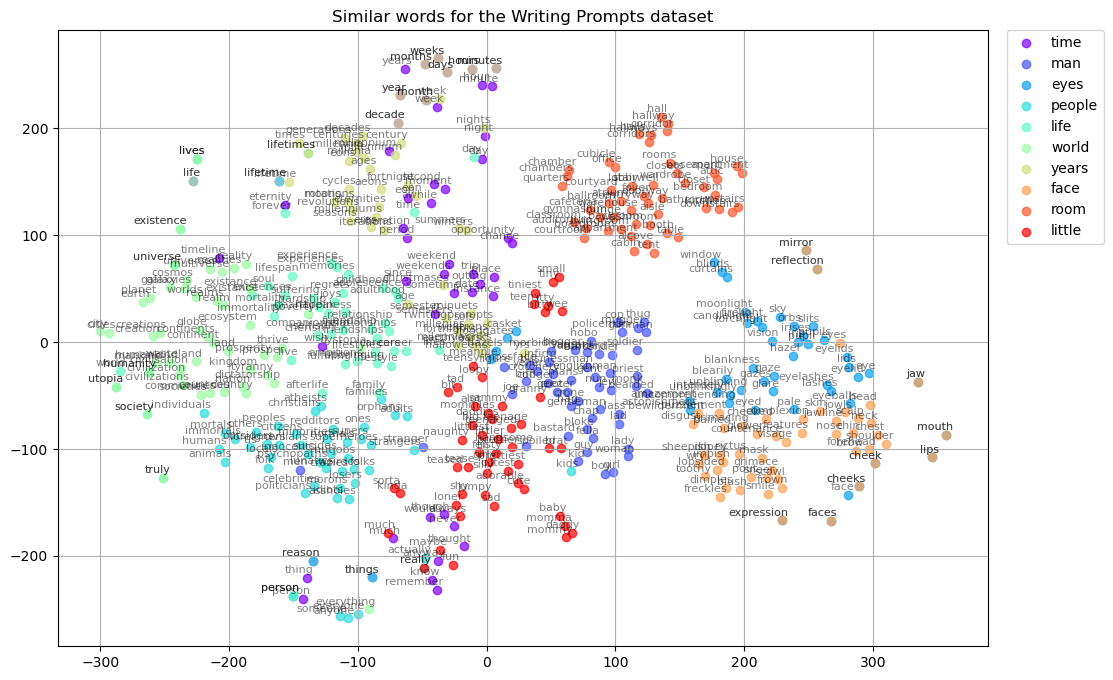

In [56]:
n, m, k = embed_cl.shape

# apply T-SNE
tsne_model2d = TSNE(perplexity=10, n_components=2, init='pca', n_iter=3000,random_state=42)
embeddings2d = np.array(tsne_model2d.fit_transform(embed_cl.reshape(n * m, k))).\
                        reshape(n, m, 2)

# visualize the dataset 
plot_clusters(embeddings2d, word_cl, relevant_words, "Similar words for the Writing Prompts dataset" )
